Q1. Using basic image operations combine the scene and object image to get the composite image as shown below. (Use img61.jpg, sample.jpg images)

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy
img1 = cv2.imread("img61.jpg")
img2 = cv2.imread("Sample_Image.jpg")
# calculating mask of Sample_Image.jpg
for i in range(240):
 for j in range(320):
        a=img2[i][j]
        if(not(a[0]>=240)):
          img2[i][j] = [0, 0, 0]
cv2.imwrite("Mask_Of_Sample_Image.jpg", img2) 
img3 = cv2.bitwise_and(img2,img1)
cv2.imwrite("Mask_addition.jpg",img3)
img4 = cv2.imread("Sample_Image.jpg")
# Sample_Image background darkening
for i in range(240):
 for j in range(320):
        a=img4[i][j]
        if((a[0]>=240)):
          img4[i][j] = [0, 0, 0]
cv2.imwrite("Sample_Background_Dark.jpg",img4) 

#Adding Sample_Background_dark and Mask_added_img61
final_image = cv2.add(img4,img3)
cv2.imwrite("Final_Merged_Image.jpg",final_image)




	



True

Q2. Write a computer program capable of reducing the number of intensity levels in an image from 256 to 2 (in various integer powers of 2 i.e. from 1 to 8). Try displaying all the images in one figure to compare the difference (use subplot utility if you are using Matlab). When this is used with a given image the results are as below. (Use sample.png image)

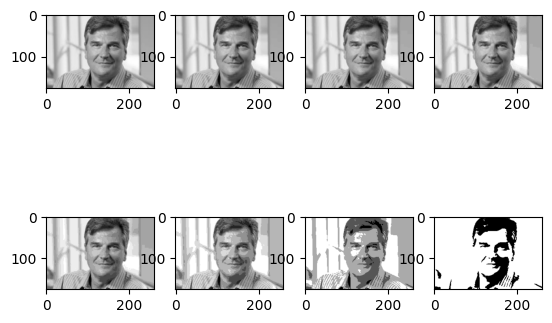

In [35]:
from re import I
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

img= cv2.imread("sample.png")
f,axrr= plt.subplots(2,4)
bits =0
for i in range(2):
  for j in range(4):
    intensity_level=2**bits
    img1=np.uint8(np.floor(np.double(img)/intensity_level))
    norm_image=cv2.normalize(img1,None,0,255,norm_type=cv2.NORM_MINMAX)
    bits=bits+1
    axrr[i,j].imshow(norm_image)
                                                                                                                                                          

Q6)Write an edge detection program by using the inbuilt canny edge detection function and see the results with different parameters like threshold, smoothing variance etc., and note your observations. (Output image shown below) (Use clown.png image) 

Text(0.5, 1.0, 'sigma 3')

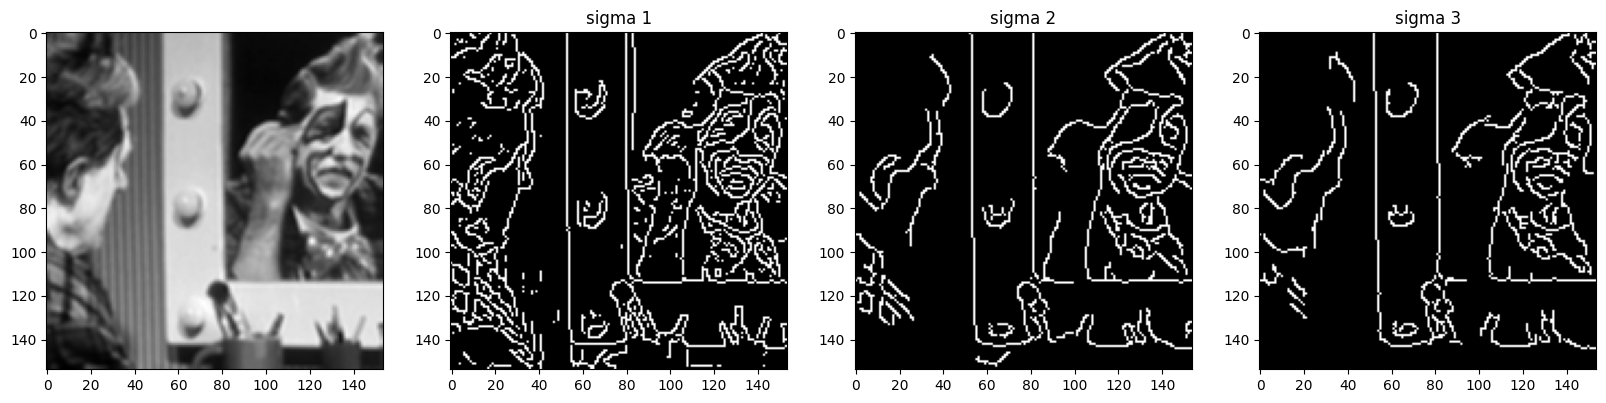

In [101]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#sigma 1
img = cv.imread('clown.png',0)
img = cv.GaussianBlur(img,(3,3),1,1)
edges = cv.Canny(img,100,100)
#sigma 2
img1 = cv.imread('clown.png',0)
img1 = cv.GaussianBlur(img1,(5,5),2,2)
edges1 = cv.Canny(img1,100,200)

#sigma 3
img2 = cv.imread('clown.png',0)
img2 = cv.GaussianBlur(img2,(5,5),8,8)
edges2 = cv.Canny(img2,100,200)
f,axrr=plt.subplots(1,4)

axrr[0].imshow(img,cmap = 'gray')
axrr[1].imshow(edges,cmap = 'gray')
axrr[1].set_title("sigma 1")
axrr[2].imshow(edges1,cmap='gray')
axrr[2].set_title("sigma 2")
axrr[3].imshow(edges2,cmap='gray')
axrr[3].set_title("sigma 3")

Q3. For the attached image ‘spine.tiff’, enhance it using (a) The log transformation and (b) A power-law transformation. In (a) the only free parameter is c, but in (b) there are two parameters, c and r for which values have to be selected. By experimentation, obtain the best visual enhancement possible with the methods in (a) and (b). Once (according to your judgment) you have the best visual result for each transformation, explain the reasons for the major differences between them. (Use spine.tiff image

C:\Users\maqui\AppData\Local\Temp\ipykernel_804\1323230095.py:11: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(image + 1))


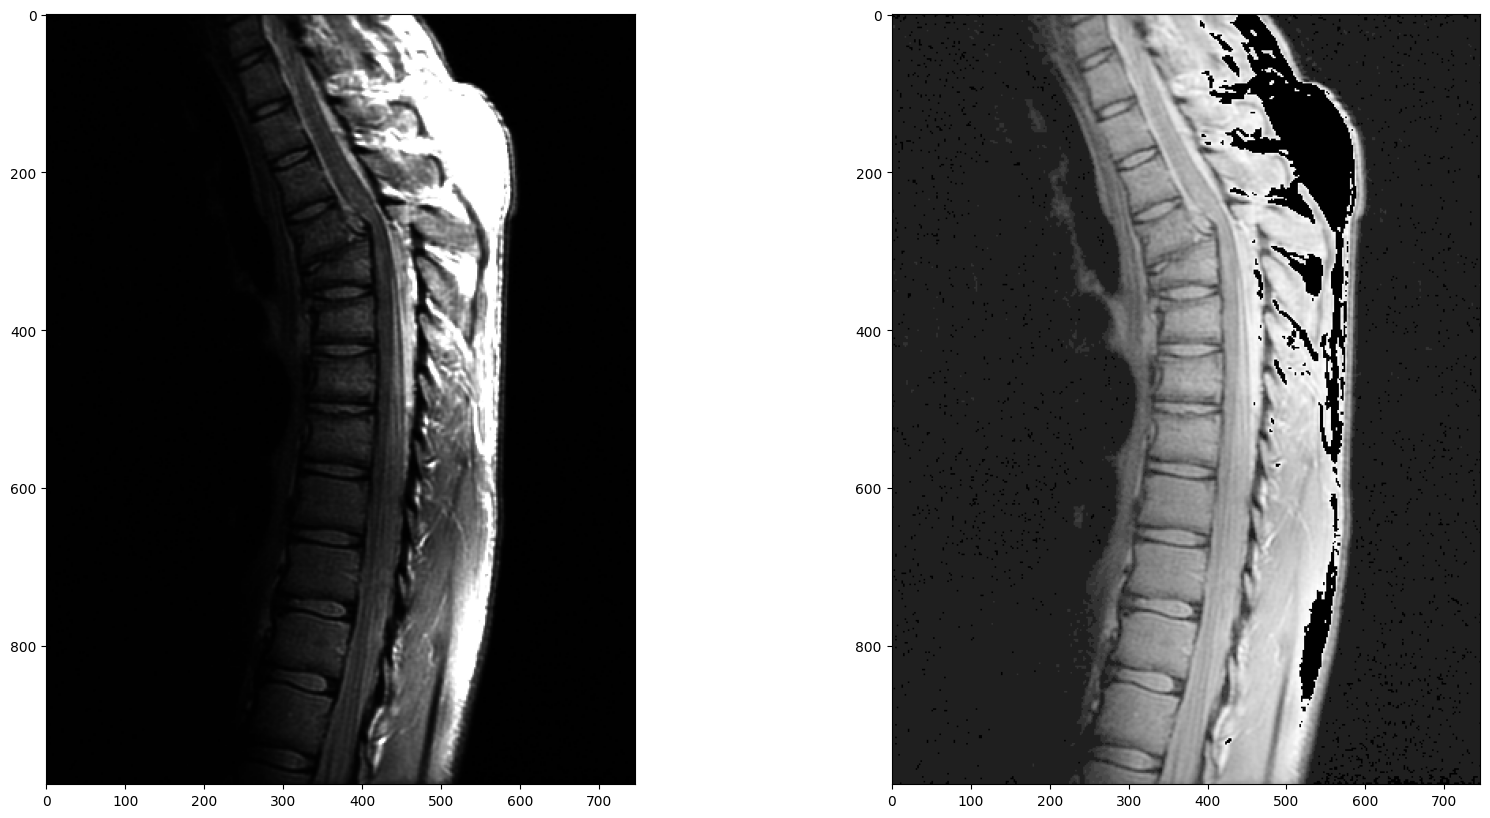

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
   
# Read an image
image = cv2.imread('spine.tif')
   
# Apply log transformation method
# f, axarr = plt.subplots(2, 4)
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))
   
# Specify the data type so that
# float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)
   
# Display both images
f,axrr = plt.subplots(1,2)
axrr[0].imshow(image)
# plt.show()
axrr[1].imshow(log_image)
# plt.show()


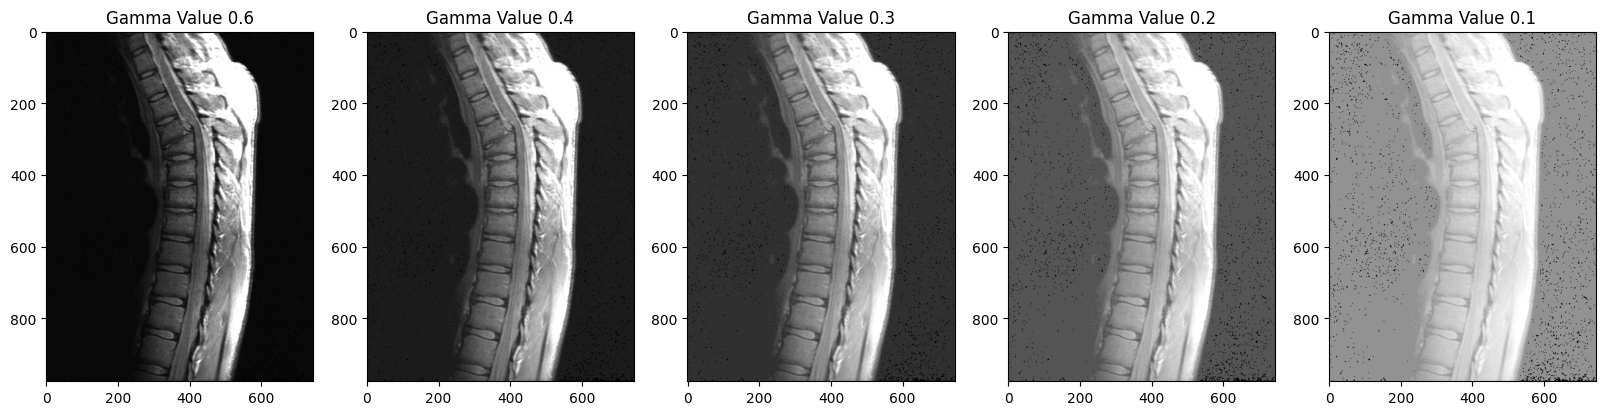

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Open the image.
img = cv2.imread('spine.tif')
f,axrr = plt.subplots(1,5)
# Trying 4 gamma values.
i=0
for gamma in [0.6, 0.4, 0.3, 0.2,0.1]:
      
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img /255) ** gamma, dtype = 'uint8')
  
    # Save edited images.
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)
    axrr[i].imshow(gamma_corrected)
    axrr[i].set_title('Gamma Value '+str(gamma))
    i=i+1

q5)Write a program to implement spatial domain averaging filter, Weighted averaging filter, and median filter of size 3X3, 5X5 and observe its blurring effect on the given noise.tiff image. Do not use inbuilt spatial filtering function.

Text(0.5, 1.0, 'Median filtered')

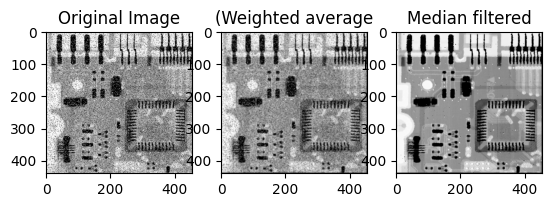

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
	
# Read the image
img = cv2.imread('noise.tif', 0)

# Obtain number of rows and columns
# of the image
m, n = img.shape

# Develop Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
		
		img_new[i, j]= temp
		
img_new = img_new.astype(np.uint8)
cv2.imwrite('blurred.jpg', img_new)

f,arr=plt.subplots(1,3)
arr[0].imshow(img,cmap='gray' )
arr[0].set_title("Original Image")
arr[1].imshow(img_new, cmap='gray')
arr[1].set_title("(Weighted average")

# Median Spatial Domain Filtering



# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img[i-1, j-1],
			img[i-1, j],
			img[i-1, j + 1],
			img[i, j-1],
			img[i, j],
			img[i, j + 1],
			img[i + 1, j-1],
			img[i + 1, j],
			img[i + 1, j + 1]]
		
		temp = sorted(temp)
		img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
cv2.imwrite('new_median_filtered.png', img_new1)

arr[2].imshow(img_new1,cmap='gray' )
arr[2].set_title("Median filtered")


KeyboardInterrupt: 

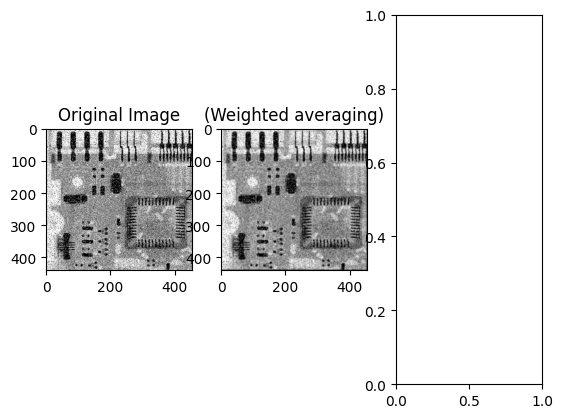

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
	
# Read the image
img = cv2.imread('noise.tif', 0)

# Obtain number of rows and columns
# of the image
m, n = img.shape

# Develop Averaging filter(3, 3) mask
mask = np.ones([5, 5], dtype = int)
mask = mask / 25

# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
		
		img_new[i, j]= temp
		
img_new = img_new.astype(np.uint8)
cv2.imwrite('blurred.jpg', img_new)

f,arr=plt.subplots(1,3)
arr[0].imshow(img,cmap='gray' )
arr[0].set_title("Original Image")
arr[1].imshow(img_new, cmap='gray')
arr[1].set_title("(Weighted averaging)")

# Median Spatial Domain Filtering



# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp=np.array(img_new1)
		m=np.median(temp)
		temp = [img[i-1, j-1],
			img[i-1, j],
			img[i-1, j + 1],
			img[i, j-1],
			img[i, j],
			img[i, j + 1],
			img[i + 1, j-1],
			img[i + 1, j],
			img[i + 1, j + 1]]
		
		temp = sorted(temp)
		img_new1[i, j]= temp[4]
		


img_new1 = img_new1.astype(np.uint8)
cv2.imwrite('new_median_filtered.png', img_new1)

arr[2].imshow(img_new1,cmap='gray' )
arr[2].set_title("Median filtered")


Q4)Write a program to find the largest correlation spot in the given image (hills.jpg) using linear filtering based template matching technique. Draw rectangular bounding box at the detected template (template.png) matched locations. (Use hills.jpeg, template.png images)

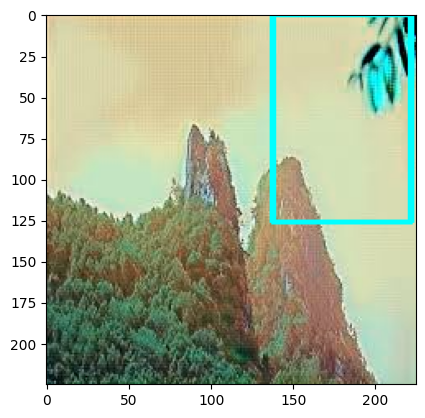

In [13]:
# Python program to illustrate
# template matching
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Read the main image
img_rgb = cv2.imread('hills.jpeg')

# Convert it to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Read the template
template = cv2.imread('template.png', 0)

# Store width and height of template in w and h
w, h = template.shape[::-1]

# Perform match operations.
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Specify a threshold
threshold = 0.26

# Store the coordinates of matched area in a numpy array
loc = np.where(res >= threshold)

# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
	cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)

# Show the final image with the matched area.

cv2.imwrite('Detected.jpeg', img_rgb)
f,arr=plt.subplots(1)
arr.imshow(img_rgb)
